*SIO221a Notes - Alford and Gille*

*Reading: Emory and Thompson section 5.4*

Concepts Covered: Fourier transform: continuous and discrete


## Lecture 7

#### *Recap*

Last time we looked at the least-squares fits and orthogonality
of sines and cosines.  This will lead us to the Fourier transform,
which provides a way to re-represent data in terms of amplitudes of
orthogonal sets of sines and cosines.  


#### The Fourier Transform

We want to represent our data via sines and cosines:
$$
x(t) = \frac{a_0}{2} + \sum_{q=1}^{\infty}\left(a_q \cos(2\pi q f_1 t) +
b_q \sin(2\pi q f_1 t)\right), \hspace{3cm} (8)
$$

where $f_q = 1/T_p$, and $T_p$ is the duration of the  record
(following Bendat and Piersol).  Formally, and to ensure orthogonality, we should assume that the
data are periodic over the period $T_p$.
We find the coefficients $a$ and $b$ by projecting our data onto the
appropriate sines and cosines:

$$
a_q = \frac{2}{T_p} \int_{0}^{T_p} x(t) \cos(2\pi q f_1 t)\, dt \hspace{3cm} (9)
$$

and

$$
b_q = \frac{2}{T_p} \int_0^{T_p} x(t) \sin(2\pi q f_1 t)\, dt \hspace{3cm} (10)
$$

solved for $q=0,1,2,....$

It's not much fun to drag around these cosines and sines, so it's useful
to recall that

$$
\cos\theta  = \frac{\exp(i\theta)+\exp(-i\theta)}{2} \hspace{3cm} (11)\\
$$

$$
\sin\theta = \frac{\exp(i\theta)-\exp(-i\theta)}{2i},  \hspace{3cm} (12)
$$

which means that we could
redo this in terms of $e^{i\theta}$ and $e^{-i\theta}$.
In other words, we can represent our data as:

$$
x(t) = \sum_{q=-\infty}^{\infty}\left[\hat{a}_q \exp(i2\pi q f_1 t)\right] =
\sum_{q=-\infty}^{\infty}\left[\hat{a}_q \exp(i\sigma_q t)\right] \hspace{3cm} (13)
$$

where $\sigma_q = 2\pi q/T$, and $\hat{a}_q$ represents a complex
Fourier coefficient.
If we solved for our coefficients for cosine and sine, then we can easily convert
them to find the complex  coefficients $\hat{a}_q$
for $\exp(i\sigma_q t)$ and $\exp(-i\sigma_q t).$
Consider:

$$
a\cos\theta + b\sin\theta  = \frac{a}{2}(e^{i\theta}+e^{-i\theta})
+ \frac{b}{2i}(e^{i\theta}-e^{-i\theta}) \hspace{3cm} (14)\\
$$

$$
=  \frac{a-ib}{2}e^{i\theta}+ \frac{a+ib}{2}e^{-i\theta} \hspace{3cm} (15).
$$

This tells us some important things.  The coefficients for $e^{i\theta}$ and
$e^{i\theta}$ are complex conjugates.  And there's a simple relationship between
the sine and cosine coefficients and the $e^{\pm i\theta}$ coefficients.
Instead of computing $\sum_{j=1}^N a_j \cos(\omega_j t)$ and
$\sum_{j=1}^N b_j \sin(\omega_j t)$, we can instead find
$\sum_{j=1}^N \hat{a}_j \exp(i\omega_j t)$ and then use the real and imaginary
parts to represent the cosine and sine components.  This gives us
a quick shorthand for representing our results as sines and cosines.

We can then simply take the limit as $N\rightarrow\infty$ to obtain the absolutely wonderful continuous Fourier transform:

$$
X(f) = \int_{-\infty}^{\infty} x(t) e^{-i2\pi f t}\, dt \hspace{3cm} (22)\\
$$

$$
x(t) = \int_{-\infty}^{\infty} X(f)  e^{i2\pi ft}\, df \hspace{3cm} (23)
$$


We're using Bendat and Piersol's notation here.  You'll see a few other others in the literature; watch for $2\pi$ and $\sqrt{2\pi}$. The same questions about choices of notation apply in the discrete form that we consider when we analyze data. As a result, we can get ourselves really confused about normalization. We can always get unconfused though: we don’t get to create energy.  That means that we need to have the same total variance in our data set in the time domain as we have in the frequency domain. This is Parseval’s theorem, and we’ll return to it.


#### *Fourier transform in discrete form*

As wonderful as the continuous form of the Fourier transform is, data come in discrete form and even the longest time series have finite length.  These will lead to some key concepts of signal processing that we'll get into soon. 

If they are uniformly separated (in time or space), then they
are easy to Fourier transform. In fact, one of the glories of the Fourier transform is that we can take all of these
projections and make them extremely efficient through the Fast Fourier
Transform (FFT).  In principle, FFT's are most efficient if you
compute them for records that are a power of 2 in length, so 64 or 128 or 256
points for example.  But modern FFTs are fast even if your data set doesn't
have $2^n$ elements. Moreover, a year doesn't have $2^n$ days, so trying to
force a data record to conform to a length of $2^n$ can suppress some of the
natural periodicity.

Mathematically the Matlab definitions look like this:
$$
X_k = \sum_{n=1}^N x_n \exp(-i2\pi (k-1) (n-1)/N),
$$

where frequency labels $k$ and data labels $n$ go from 1 to $N$.  Here
capital letters are used to denote Fourier transformed variables.
Matlab computes this using the command "fft".

The inverse of the Fourier  transform is computed using "ifft"
and is defined to be:

$$
x_n = \frac{1}{N} \sum_{k=1}^N X_k \exp(i2\pi (k-1)(n-1)/N)
$$


In Matlab the Fourier transform and inverse Fourier transform become:

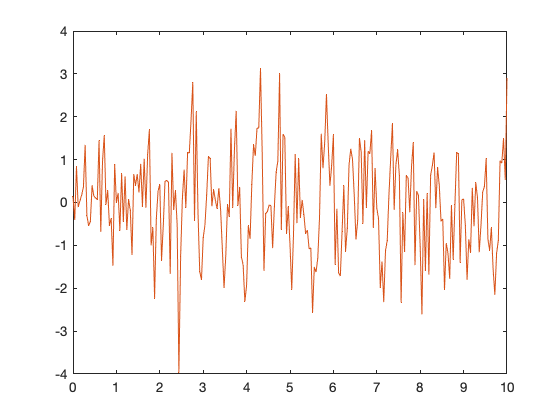

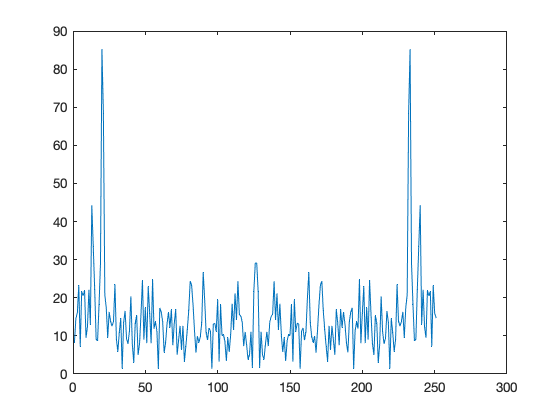

In [15]:
%Let's make a signal plus some noise
time=0:.04:10; %time in days
P=12.4/24;
x=randn(size(time))+sin(2*pi.*time ./ P);
f=fft(x);
x_new=ifft(f);
plot(time,x,time,x_new)

figure(2)
%We can plot the Fourier coefficients too.
plot(abs(f))
%fftshift is useful here too.

We can already see some nice properties of this technique, even though we're just getting started.  First, note that the time series contained signal and noise, but it was hard to see which was which.  In frequency space the sine wave sticks out like a sore thumb, giving us hope for making sense of the data.

Second, note that the Fourier coefficients are "mirrored" from left to right.  This turns out to be an important property of Fourier transforms: namely, that the negative coefficients are the complex conjugates of each other for real time series.  So we really only need to plot one half of the spectrum for real time series.  Later, we'll see what extra information the positive and negative coefficients have for complex time series such as the rotary velocity $w\equiv u + iv$.

Of course, in this example, we knew the frequency exactly, so we could have just
done a least-squares fit, but often we aren't exactly sure of the frequencies
in question---there might be energy spread over a broad range of frequencies,
and the Fourier tranform provides us with a way to examine our data in terms
of oscillatory signals.

In the next lecture we will prove Parseval's theorem, which states that we must have the same amount of variance in the time domain as in the frequency domain - ie, the transform preserves energy.  

This is fundamentally important of course, but it's also of great practical use in sorting out the many different normalization conventions that we'll come across.  

To make Parseval's theorem work, the variance of our data has to equal the variance of the Fourier transform.  Thus we'll want to compare:

In [13]:
sum(x.^2)
sum(abs(f).^2)
f'*f;
sum(f.*conj(f))


ans =

   1.5822e+03


ans =

   1.5838e+06


ans =

   1.5838e+06



They don't quite agree, so we'll see that we should divide the Fourier transform
by $N$, the number of data points.

It's a good time to point out a couple of very useful Fourier transform pairs, and to begin wrapping our mainds around the idea that signals that are quite wide in time tend to be compact in frequency, and vice versa.  We'll formalize this later when we show that the autocorrelation is in fact the Fourier transform of the spectrum!  We can begin to think of this in terms of a single sine wave, which is a $\delta$ function in frequency space but whose time series is of infinite extent.  More formally, a Gaussian in the time domain gives a Gaussian in the frequency domain (we won't show this here).  However, the width of the Gaussian in the time and frequency domains are inverses of each other, a sort of Heisenberg uncertainty principle for time series analysis that we'll talk about quite a bit as we move along.

A practical consequence of this is that spikes in our data (time domain) can create quite widespread effects in the frequency domain.  So Alford's first rule of time series analysis is *never FFT anything that you have not looked at in the time domain first!*

#### The Spectrum

Today is the last day you don't know about the spectrum!

Now that we have a time series $x(t)$ and its Fourier coefficients $X(f)$, we *define* the spectrum, or more precisely the power spectral density, as the amplitude of the coefficients at a given frequency, divided by the frequency resolution $\Delta f = \frac{1}{T}$ where $T$ is the time series length:

$$\Phi_x(f) \equiv \lim_{\Delta f \to 0}\frac{\langle X^*(f)X(f)\rangle}{\Delta f}$$

And remember, we have gone to some trouble to ensure that $X(f)$ is normalized correctly so that energy is conserved.  Then in words, this means "the energy in the time series between frequency $f$ and $f+\Delta f$." Or, the *density* in frequency space of the energy. 

Though simple looking, there are a few aspects of this equation that will trouble us for the next few weeks: 

1. What does this actually mean?  
2. What's up with those angle brackets?  What are we averaging over?
3. How do we think of the $\Delta f$ in the denominator?

As stated, we can show that the autocorrelation and the spectrum are Fourier transform pairs as well.  The impact of this is that a noise-only time series, which has a delta-function autocorrelation function (it is uncorrelated with itself except at a lag of zero), has a "white" spectrum.  We often see this in data analysis; namely, that noise will be assumed to be white.